1. Mssv: 19521994
2. Họ Tên: Ngô Thành Phát
3. Bài Tập: Bài Tập 1
4. Ngày Thực Hiện: 20/09/2002

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import os
dir_monhoc = '/gdrive/MyDrive/CS231.N12.KHCL'

In [ ]:
dir_baitap = os.path.join(dir_monhoc, 'Baitap', 'Baitap2') 
dir_images = os.path.join(dir_baitap, 'images')

In [ ]:

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage.exposure as exposure
import scipy.ndimage as ndimage

In [ ]:
path_filename = os.path.join(dir_images,'Bicycle.jpg') 
img = cv2.imread(path_filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

path_filename_2 = os.path.join(dir_images,'bansoxe.jpg') 
img_2 = cv2.imread(path_filename_2)
gray_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)




In [ ]:
# blur
blur = cv2.GaussianBlur(gray, (0,0), 1.3, 1.3)

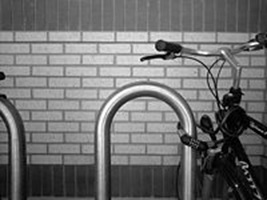

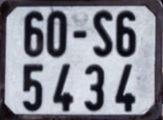

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

from google.colab.patches import cv2_imshow
cv2_imshow(img_2)




# Yêu cầu 1: Đọc ảnh và hiển thị ảnh kết quả sau khi dò tìm cạnh: Gx, Gy và G 
# 2 ảnh: Bicycle.jpg và ( bansoxe.jpg hoặc houseg.bmp)

In [ ]:
def sobel_filters(img):
  Sx=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],np.float32)
  Sy=np.array([[1,2,1],[0,0,0],[-1,-2,-1]],np.float32)

  Ix = cv2.filter2D(img, -1, Sx)
  Iy = cv2.filter2D(img, -1, Sy)

  G=np.hypot(Ix,Iy)
  G=G/G.max()*255
  theta=np.arctan2(Iy,Ix)

  return Ix,Iy,G,theta

In [ ]:
def show2image(img_src, img_rst, title1, title2):
  plt.figure(figsize=(10,20))
  # show img src
  plt.subplot(1,2,1)
  plt.title(title1)
  img_src = cv2.cvtColor(img_src.astype(np.uint8), cv2.COLOR_BGR2RGB)
  plt.imshow(img_src, interpolation='bicubic')

  # show img result
  plt.subplot(1,2,2)
  plt.title(title2)
  img_rst = cv2.cvtColor(img_rst.astype(np.uint8), cv2.COLOR_BGR2RGB)
  plt.imshow(img_rst, interpolation='bicubic')

In [ ]:
Ix,Iy,G,theta = sobel_filters(img)

In [ ]:
# apply sobel derivatives
sobelx = cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(blur,cv2.CV_64F,0,1,ksize=3)


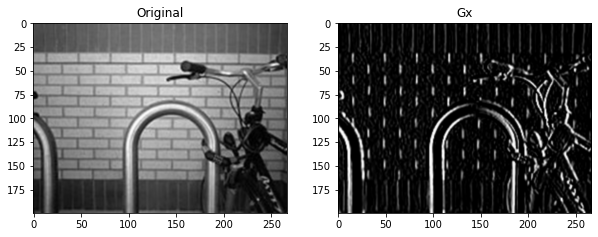

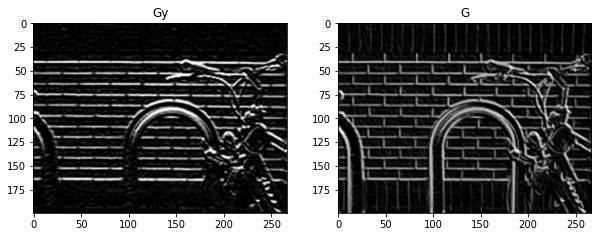

In [ ]:
show2image(img,Ix,"Original","Gx")
show2image(Iy,G,"Gy","G")

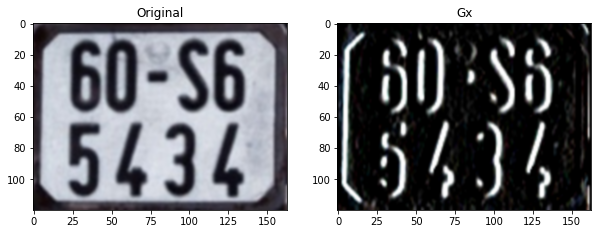

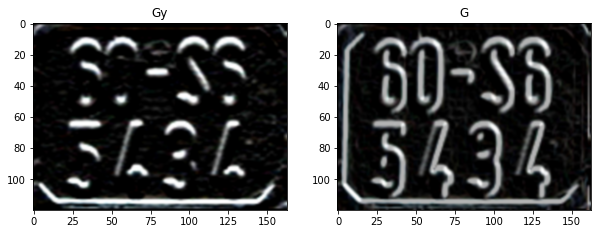

In [ ]:
Ix,Iy,G,theta = sobel_filters(img_2)

show2image(img_2,Ix,"Original","Gx")
show2image(Iy,G,"Gy","G")

**Yêu cầu 2:**
- Viết hàm xác định đặc trưng ảnh dựa trên
thông tin cạnh: theo trục x và trục y
- Tính khoảng cách euclidean giữa 2 ảnh: sử
dụng thư viện của scipy
-  Tính sự tương đồng theo cosin giữa 2 ảnh.


2 cặp ảnh:

< image_0814.jpg, image_0816.jpg>
< image_0814.jpg, image_1248.jpg>


In [ ]:
path_filename0814 = os.path.join(dir_images,'image_0814.jpg') 
img1 = cv2.imread(path_filename0814)

path_filename0816 = os.path.join(dir_images,'image_0816.jpg') 
img2 = cv2.imread(path_filename0816)

path_filename1248 = os.path.join(dir_images,'image_1248.jpg') 
img3 = cv2.imread(path_filename1248)



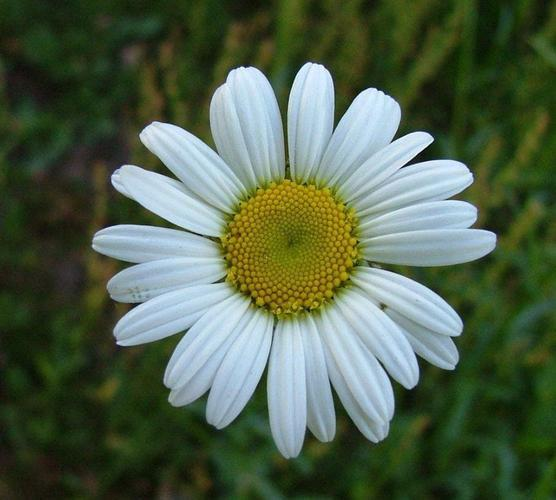

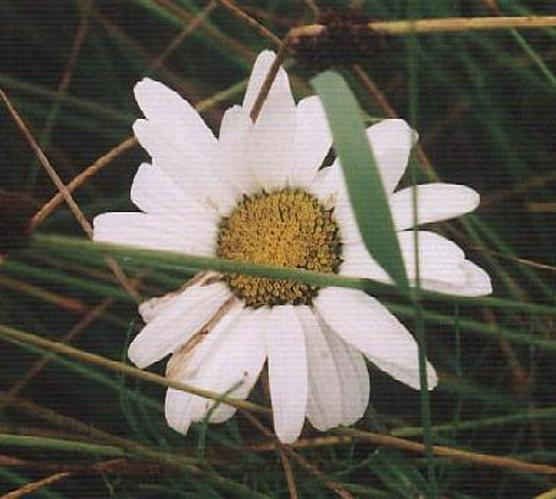

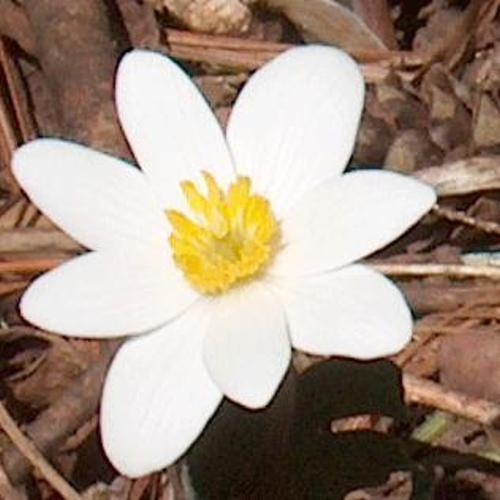

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img1)
from google.colab.patches import cv2_imshow
cv2_imshow(img2)
from google.colab.patches import cv2_imshow
cv2_imshow(img3)

# Viết hàm xác định đặc trưng ảnh dựa trên thông tin cạnh: theo trục x và trục y

In [ ]:
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)

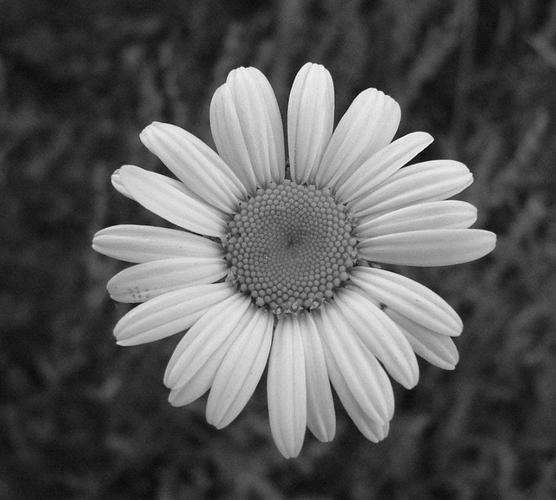

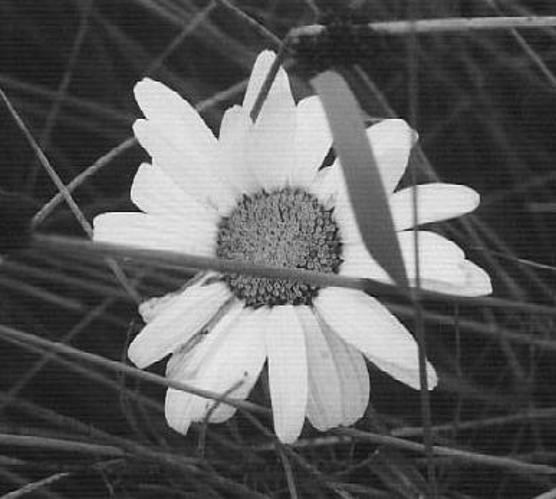

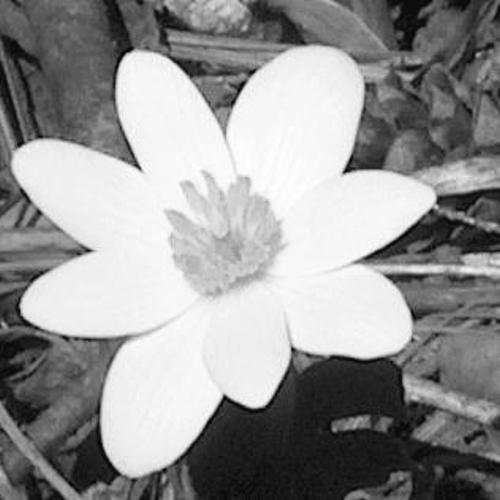

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(gray1)
from google.colab.patches import cv2_imshow
cv2_imshow(gray2)
from google.colab.patches import cv2_imshow
cv2_imshow(gray3)

In [ ]:
blur = cv2.GaussianBlur(gray, (0,0), 1.3, 1.3)

In [ ]:
sobelx = cv2.Sobel(0,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(0,cv2.CV_64F,0,1,ksize=3)

In [ ]:
sobelx_norm= exposure.rescale_intensity(sobelx, in_range='image', out_range=(0,255)).clip(0,255).astype(np.uint8)
sobely_norm= exposure.rescale_intensity(sobelx, in_range='image', out_range=(0,255)).clip(0,255).astype(np.uint8)

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow( sobelx_norm)  


# Tính khoảng cách euclidean giữa 2 ảnh(spicy)

In [ ]:
def calFeatureVector(img):
 img_ = cv2.resize(img, (256, 256))
 _, _, G, _ = sobel_filters(img_)
 row_sum = np.sum(G, axis=1, dtype=np.float64)
 col_sum = np.sum(G, axis=0, dtype=np.float64)
 return (np.hstack((row_sum.T, col_sum)))

In [ ]:
feature_1 = calFeatureVector(img1)
feature_2 = calFeatureVector(img2)
feature_3 = calFeatureVector(img3)

In [ ]:
distance.euclidean(feature_1, feature_2)

55432.88078311733

In [ ]:
distance.euclidean(feature_2, feature_3)

80771.35103165392

# Tính sự tương đồng consin giữa 2 ảnh

In [ ]:
cosin_d1 = 1 - distance.cosine(feature_1,feature_2)
print("Cosine distance between case 1 is: ", cosin_d1)

cosin_d2 = 1 - distance.cosine(feature_2,feature_3)
print("Cosine distance between case 2 is: ", cosin_d2)

Cosine distance between case 1 is:  0.9403013260778476
Cosine distance between case 2 is:  0.8695594349837702
